In [20]:
##### California House Prices Predict ######

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Load the data
df = pd.read_csv("/home/ml-abu-saleh-ml/JUPYTER/DATASETS/housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [24]:
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [26]:
#Seeing the most intersting things about all the features.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
#We can see hier that there NaN in the total_bedrooms column, and also that the ocean_proximity is non numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
#The number of the NaN
df['total_bedrooms'].isnull().sum()

207

In [32]:
#Drop all the NaN (NUll-VALUES)
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [33]:
#Split the data :-
from sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'], axis=1) #Axis equals 1 because we are dropping a column
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [34]:
#Join the train data (the input and the ouput) together, in order to make some realtion analysis
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16467,-121.27,38.13,39.0,2614.0,634.0,1862.0,654.0,1.9238,INLAND,70700.0
2236,-119.80,36.86,7.0,6434.0,1201.0,2733.0,1045.0,3.7656,INLAND,145000.0
11291,-117.94,33.78,34.0,2627.0,468.0,1409.0,450.0,4.7731,<1H OCEAN,199200.0
14782,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478,NEAR OCEAN,138900.0
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,NEAR OCEAN,76100.0
...,...,...,...,...,...,...,...,...,...,...
19539,-120.96,37.65,34.0,1700.0,325.0,972.0,326.0,2.4485,INLAND,95500.0
17268,-119.71,34.40,36.0,1846.0,358.0,748.0,329.0,4.2283,NEAR OCEAN,326800.0
7234,-118.14,34.02,42.0,1384.0,458.0,1825.0,455.0,1.4178,<1H OCEAN,145500.0
15352,-117.31,33.25,14.0,3483.0,764.0,2140.0,687.0,3.1250,<1H OCEAN,102300.0


In [35]:
#Join the test data (the input and the ouput) together, in order to make some realtion analysis
test_data = X_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9371,-122.53,37.92,42.0,1741.0,301.0,723.0,306.0,5.5379,NEAR BAY,410500.0
16975,-122.31,37.56,40.0,1351.0,330.0,701.0,297.0,3.3200,NEAR OCEAN,292900.0
3320,-122.83,38.99,15.0,289.0,49.0,191.0,54.0,1.6833,INLAND,113900.0
13016,-121.18,38.69,7.0,7104.0,970.0,2772.0,920.0,6.3528,INLAND,274500.0
2904,-119.01,35.37,45.0,629.0,143.0,568.0,139.0,1.7321,INLAND,84400.0
...,...,...,...,...,...,...,...,...,...,...
4973,-118.28,34.00,42.0,1534.0,417.0,1295.0,380.0,2.0938,<1H OCEAN,119200.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,90400.0
15470,-117.20,33.16,13.0,4503.0,1137.0,3094.0,1091.0,2.3159,<1H OCEAN,91600.0
19908,-119.26,36.30,18.0,3578.0,720.0,1540.0,640.0,2.4250,INLAND,84600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

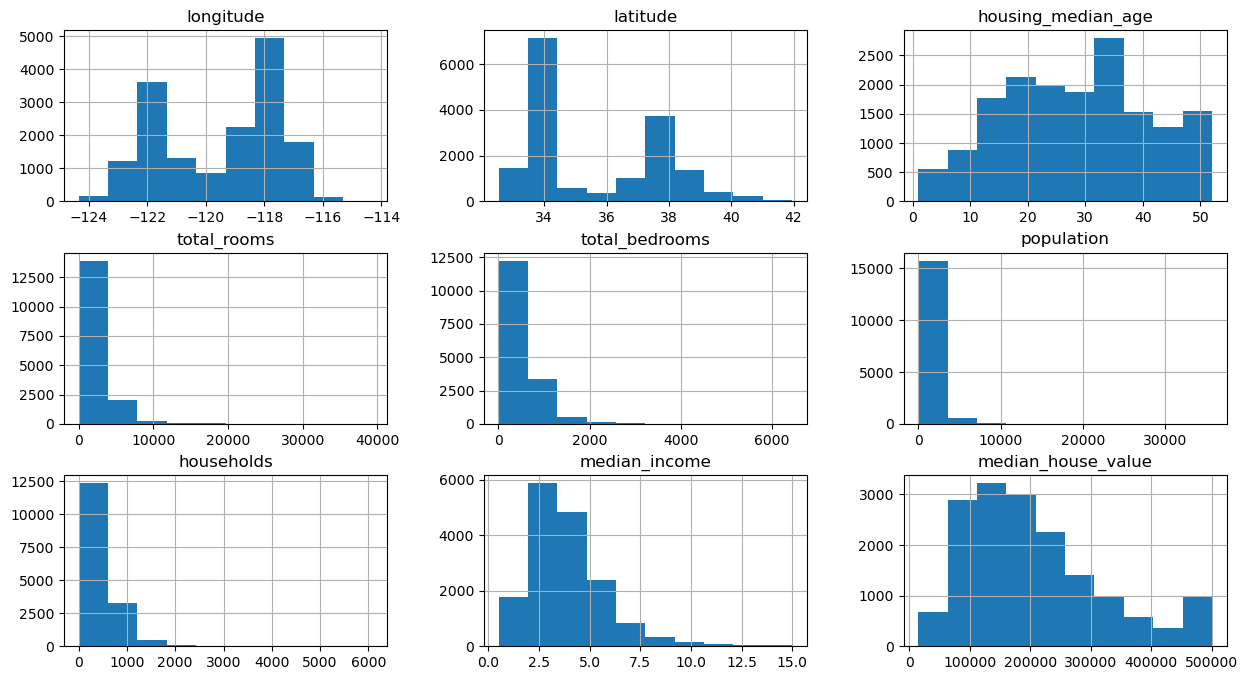

In [36]:
#Drop all the not numeric values and plot it into a histogramm
train_data_numeric = train_data.select_dtypes(include=['number'])
train_data_numeric.hist(figsize=(15,8))

<Axes: >

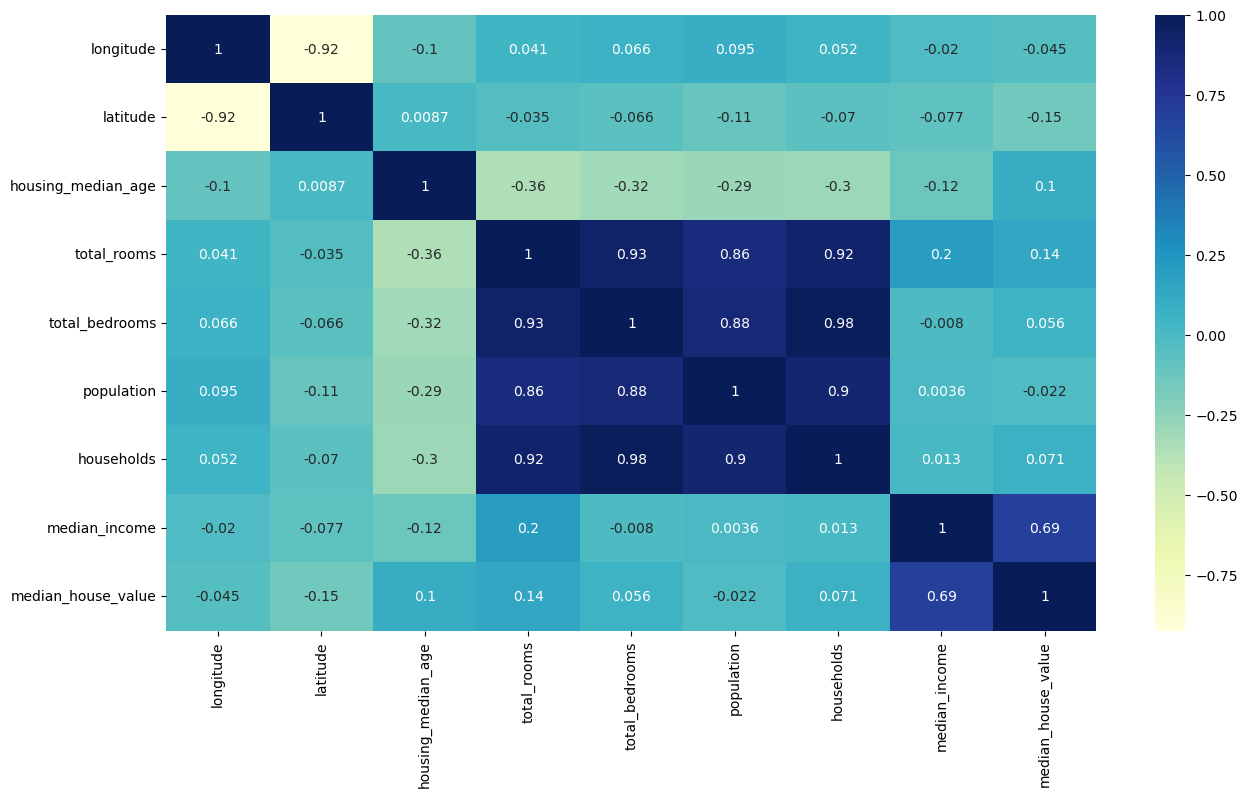

In [37]:
#Correlation with the target variable
plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

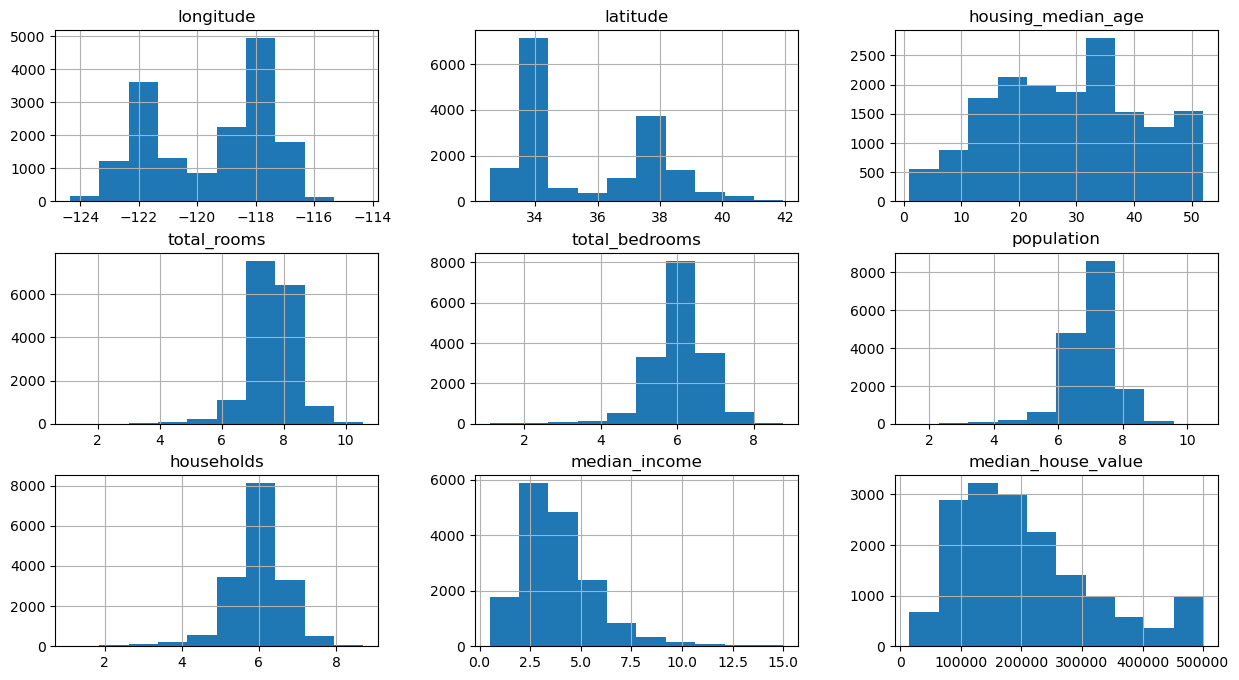

In [38]:
#Shift the histogramm to be in the middle.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
train_data.hist(figsize =(15,8))

In [39]:
print(test_data.ocean_proximity.value_counts())
print(train_data.ocean_proximity.value_counts())

ocean_proximity
<1H OCEAN     1827
INLAND        1280
NEAR OCEAN     499
NEAR BAY       480
ISLAND           1
Name: count, dtype: int64
ocean_proximity
<1H OCEAN     7207
INLAND        5216
NEAR OCEAN    2129
NEAR BAY      1790
ISLAND           4
Name: count, dtype: int64


In [40]:
#one Halton Coding, and drop the ocean_proximity column. so we are joinnig the get_dummies on ocean_proximty with the data 
train_data =train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)
test_data =test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16467,-121.27,38.13,39.0,7.869019,6.453625,7.529943,6.484635,1.9238,70700.0,0,1,0,0,0
2236,-119.80,36.86,7.0,8.769507,7.091742,7.913521,6.952729,3.7656,145000.0,0,1,0,0,0
11291,-117.94,33.78,34.0,7.873978,6.150603,7.251345,6.111467,4.7731,199200.0,1,0,0,0,0
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,138900.0,0,0,0,0,1
2656,-124.25,40.28,32.0,7.266129,6.040255,6.075346,5.236442,1.9417,76100.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,-120.96,37.65,34.0,7.438972,5.786897,6.880384,5.789960,2.4485,95500.0,0,1,0,0,0
17268,-119.71,34.40,36.0,7.521318,5.883322,6.618739,5.799093,4.2283,326800.0,0,0,0,0,1
7234,-118.14,34.02,42.0,7.233455,6.129050,7.509883,6.122493,1.4178,145500.0,1,0,0,0,0
15352,-117.31,33.25,14.0,8.155936,6.639876,7.669028,6.533789,3.1250,102300.0,1,0,0,0,0


<Axes: >

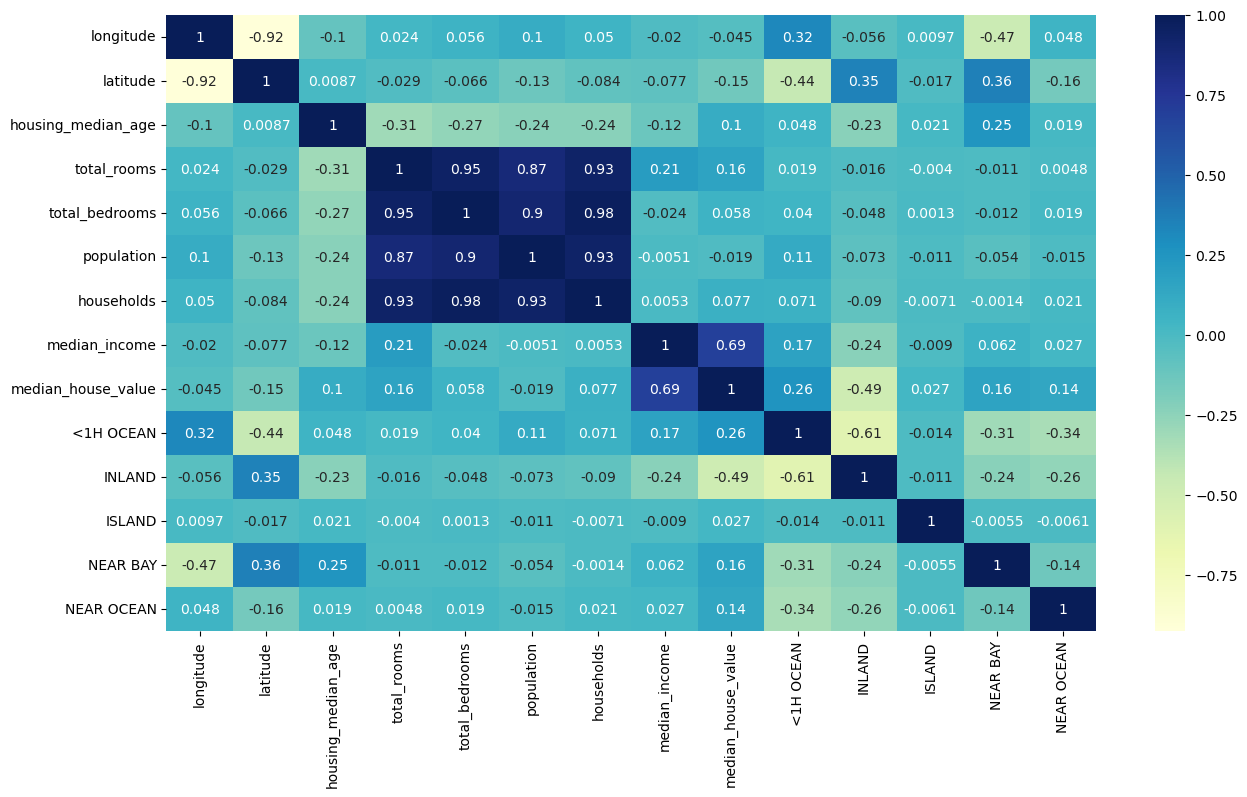

In [41]:
#Heat map correlation target value
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

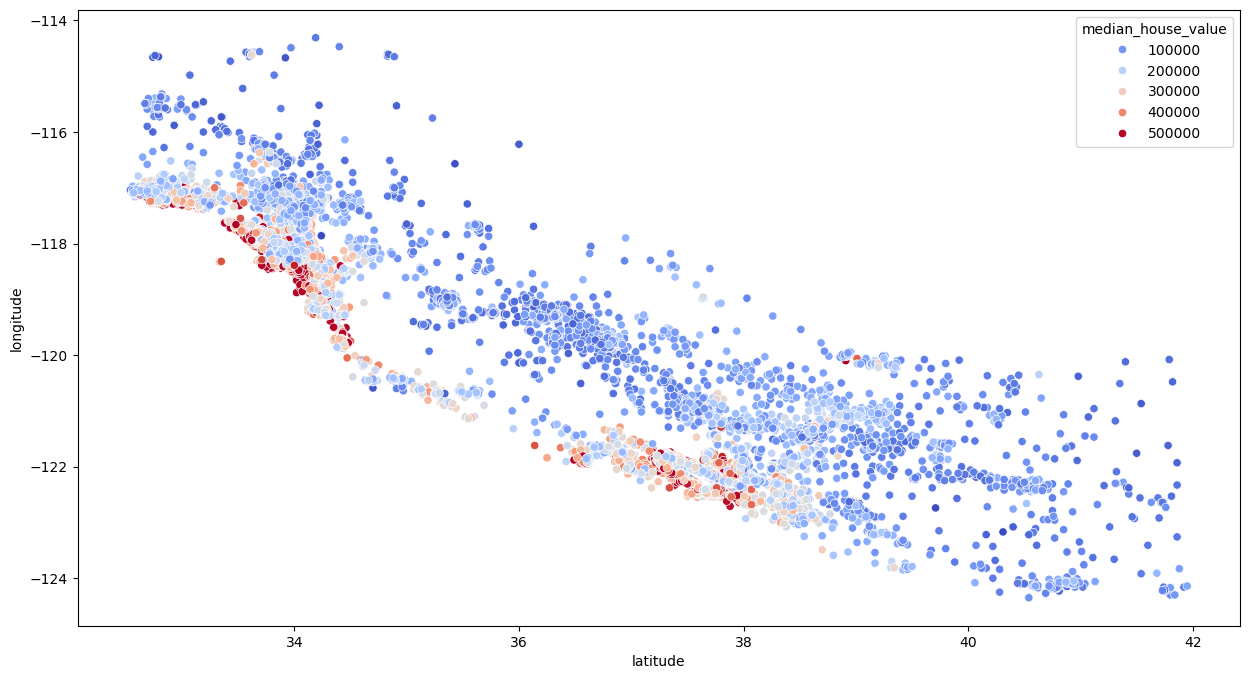

In [42]:
#correlation bettwen longitude and latitude. we can see at the coast the houses are the most expensive ones
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

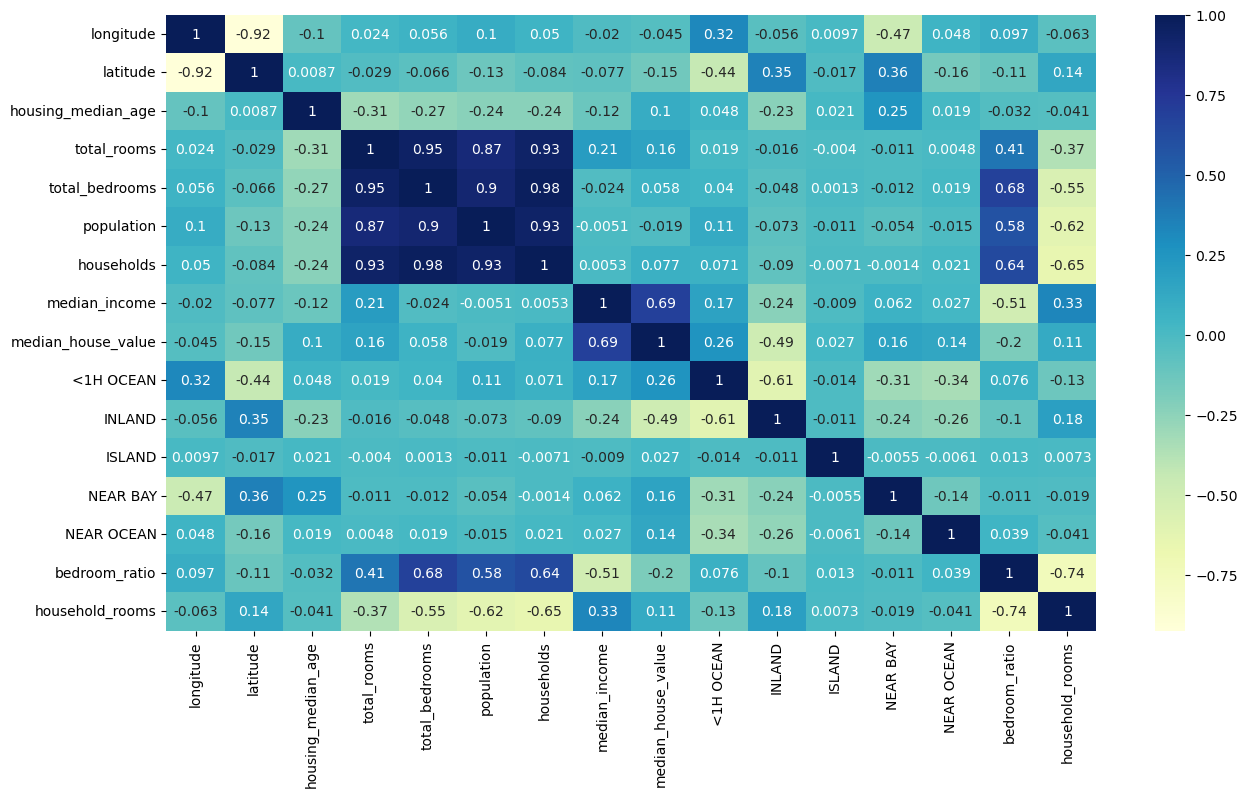

In [43]:
#Data enginnering adding two new data to the data frame and visuilaize it with a heatmap
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

#Data enginnering adding two new data to the data frame and visuilaize it with a heatmap
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [44]:
#Building a LinearRegression moodle and scalling the data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

x_train_s = scaler.fit_transform(x_train) #Scale the data

reg = LinearRegression()
reg.fit(x_train_s, y_train) #Using the moodle



LinearRegression()

In [46]:
#Preparing the test data
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [47]:
#Scalling the test data
x_test_s = scaler.transform(x_test)

In [48]:
x_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9371,-122.53,37.92,42.0,7.462789,5.710427,6.584791,5.726848,5.5379,0,0,0,1,0,0.765187,1.303123
16975,-122.31,37.56,40.0,7.209340,5.802118,6.553933,5.697093,3.3200,0,0,0,0,1,0.804806,1.265442
3320,-122.83,38.99,15.0,5.669881,3.912023,5.257495,4.007333,1.6833,0,1,0,0,0,0.689966,1.414876
13016,-121.18,38.69,7.0,8.868554,6.878326,7.927685,6.825460,6.3528,0,1,0,0,0,0.775586,1.299334
2904,-119.01,35.37,45.0,6.445720,4.969813,6.343880,4.941642,1.7321,0,1,0,0,0,0.771025,1.304368


In [48]:
x_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9371,-122.53,37.92,42.0,7.462789,5.710427,6.584791,5.726848,5.5379,0,0,0,1,0,0.765187,1.303123
16975,-122.31,37.56,40.0,7.209340,5.802118,6.553933,5.697093,3.3200,0,0,0,0,1,0.804806,1.265442
3320,-122.83,38.99,15.0,5.669881,3.912023,5.257495,4.007333,1.6833,0,1,0,0,0,0.689966,1.414876
13016,-121.18,38.69,7.0,8.868554,6.878326,7.927685,6.825460,6.3528,0,1,0,0,0,0.775586,1.299334
2904,-119.01,35.37,45.0,6.445720,4.969813,6.343880,4.941642,1.7321,0,1,0,0,0,0.771025,1.304368


In [50]:
#The score of the regression moodle
reg.score(x_test_s, y_test)

0.658829280819716

In [56]:
#Using the random forest moodle
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [57]:
#See the score of the random forest
forest.score(x_test_s, y_test)

0.8154931905540799